In [2]:
import pandas as pd
from sklearn.cross_validation import train_test_split
from sklearn.metrics import log_loss
#plot graf in the same window :
%matplotlib inline 


In [3]:
df = pd.read_csv('C:\\Users\\123\\Documents\\Python\\Numerai\\17062016\\numerai_training_data.csv')
df[:3]

,feature1,feature2,feature3,feature4,feature5,feature6,feature7,feature8,feature9,feature10,...,feature13,feature14,feature15,feature16,feature17,feature18,feature19,feature20,feature21,target
0,0.868641,0.506737,0.612936,0.938595,0.497599,0.666397,0.391871,0.727679,0.150861,0.772584,...,0.214899,0.629554,0.242945,0.073367,0.275067,0.445347,0.508649,0.230881,0.594809,1
1,0.187007,0.830566,0.507771,0.346876,0.413323,0.470311,0.948288,0.253222,0.825946,0.596589,...,0.723233,0.298058,0.729876,0.808066,0.364541,0.573677,0.562000,0.395796,0.337659,0
2,0.219104,0.855200,0.259224,0.888770,0.304351,0.882074,0.651708,0.341599,0.162460,0.513674,...,0.000644,0.964616,0.035270,0.217261,0.145543,0.792258,0.235331,0.403457,0.803910,0


In [4]:
df.shape

(96320, 22)

In [5]:
x = df.ix[:,:-1]
y = df.ix[:,-1]
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.33, random_state=42)

In [27]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression

# clf = RandomForestClassifier(n_estimators=450,max_depth=9,min_samples_split=12)
clf = LogisticRegression()
clf_mod = clf.fit(x_train,y_train)
y_pred = [a[1] for a in 
          clf_mod.predict_proba(x_test)]

lg = log_loss(y_test,y_pred)
print("Logloss: %0.4f" % (lg))

Logloss: 0.6915


In [11]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression

rf = RandomForestClassifier(n_estimators=450,max_depth=20,min_samples_split=12)
# clf = LogisticRegression()
rf_mod = rf.fit(x_train,y_train)

Logloss: 16.6579


In [33]:
y_pred = [a[1] for a in 
          rf_mod.predict_proba(x_test)]
lg = log_loss(y_test,y_pred)
print("Logloss: %0.4f" % (lg))

Logloss: 0.6929


In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import MinMaxScaler
from sklearn.pipeline import make_pipeline

model = make_pipeline(PolynomialFeatures(3), MinMaxScaler(),LogisticRegression())
model.fit(x_train,y_train)
y_pred = [a[1] for a in 
          model.predict_proba(x_test)]

lg = log_loss(y_test,y_pred)
print("Logloss: %0.5f" % (lg))

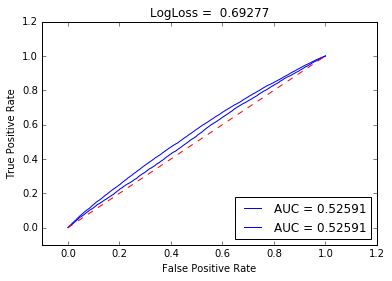

In [14]:
#plot graf in the same window :
%matplotlib inline 

from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test,y_pred)
roc_auc = auc(false_positive_rate, true_positive_rate)

y_pred2 = [a[1] for a in 
          model.predict_proba(x_train)]
false_positive_rate2, true_positive_rate2, thresholds2 = roc_curve(y_train,y_pred2)
roc_auc2 = auc(false_positive_rate, true_positive_rate)

plt.title('LogLoss =  %0.5f' % (lg))
plt.plot(false_positive_rate, true_positive_rate, 'b',
    label='AUC = %0.5f'% roc_auc)
plt.plot(false_positive_rate2, true_positive_rate2, 'b',
    label='AUC = %0.5f'% roc_auc2)
plt.legend(loc='lower right')
plt.plot([0,1],[0,1],'r--')
plt.xlim([-0.1,1.2])
plt.ylim([-0.1,1.2])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [10]:
df_t = pd.read_csv('C:\\Users\\123\\Documents\\Python\\Numerai\\17062016\\numerai_tournament_data.csv')
pred = pd.DataFrame(df_t.t_id)
yt_pred = model.predict_proba(df_t.drop('t_id',axis=1))
pred['probability'] = [a[1] for a in yt_pred]
pred[:3]

,t_id,probability
0,19778,0.503979
1,21465,0.528993
2,25493,0.572831


In [11]:
pred.to_csv('C:\\Users\\123\\Documents\\Python\\Numerai\\17062016\\test.csv',index=False)